Sayid Muhamad Ridho Fadilah
1301154312
IF3904

In [99]:
#library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import random

In [100]:
#load data train
dataTrain = pd.read_csv('TrainsetTugas2.txt', delimiter = "\t")
print (dataTrain)

        x1     x2
0    21.30  20.80
1    20.15  20.90
2    19.20  21.35
3    19.10  21.85
4    18.45  22.80
5    19.40  23.00
6    19.55  22.25
7    19.80  21.85
8    20.50  21.85
9    21.70  21.90
10   21.40  22.30
11   21.00  22.60
12   21.15  22.95
13   19.75  23.65
14   19.20  23.70
15   18.45  24.35
16   20.65  23.85
17   19.70  24.60
18   20.15  25.05
19   22.15  25.10
20   21.60  24.65
21   21.90  23.65
22   22.55  23.50
23   22.55  24.30
24   23.30  24.45
25   24.25  24.35
26   23.80  25.25
27   23.40  23.80
28   22.90  23.20
29   22.30  22.80
..     ...    ...
658  34.40  25.60
659   7.80  13.70
660   8.85  13.35
661   9.00  12.70
662   8.05  12.90
663   7.70  13.25
664   6.80  13.20
665   6.60  13.45
666   6.20  12.55
667   5.40  12.85
668   5.20  11.90
669   5.15  11.35
670   5.85  11.20
671   6.10  11.75
672   7.00  12.35
673   7.05  12.45
674   7.90  12.50
675   8.55  12.10
676   7.10  11.95
677   6.90  11.50
678   6.85  10.90
679   6.40  10.70
680   5.90  10.30
681   6.40

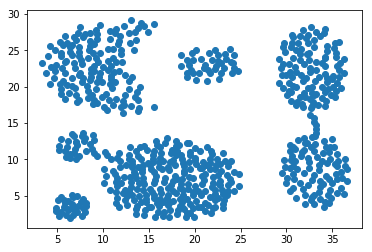

In [101]:
#plot data train
plt.plot(dataTrain["x1"], dataTrain["x2"], "o")

In [102]:
#inisialisasi nilai K (jumlah cluster) dan nilai centroid (x,y)
clusterSet = []
K = 7
for i in range (K):
    x1 = random.uniform(3,40) #dari data yang di plot, range nilai x dari 3 sampai 40
    x2 = random.uniform(1,30) #dari data yang di plot, range nilai y dari 1 sampai 30
    x = [x1,x2]
    clusterSet.append(x)
    
print (clusterSet)

[[7.31495214794763, 9.42964943448418], [29.313058048194826, 25.908504265872388], [18.644842689768247, 25.095057765624954], [21.54726876929, 14.014722895157545], [32.79908026746773, 11.439215809002297], [37.33778835369619, 25.643193264591762], [30.598891184758443, 29.60973295962152]]


In [120]:
#fungsi bersihin data. ngehilangin nilai x1 dan x2 dan membuat tipenya menjadi float
def dataClean(data):
    hasilData=[]
    for i in range(data.shape[1]):
        a = i+1
        b = "x"+str(a) #menggabungkan nilai dengan nilai x
        hasilData.append(float(data[b])) #membuat menjadi float
    return hasilData

In [104]:
#mencari jarak centroid dengan data
def euclideanDistance(data1, data2):
    hasil = 0
    for i in range(len(data1)):
        hasil += (data1[i]-data2[i])**2
    return hasil ** 0.5

In [105]:
#cluster pertama kali
indexCluster = [[],[],[],[],[],[],[]] #menyimpan index data yang di cluster
nilaiCluster = [[],[],[],[],[],[],[]] #menyimpan nilai x1,x2 data yang di cluster
for i in range(dataTrain.shape[0]):
    data = dataClean(dataTrain[i:i+1])
    print ("data ke-",i)
    minimum = euclideanDistance(data,clusterSet[0]) #menginisialisasi nilai minimum
    clusterr = 0 #menginisialisasi index minimum berada pada cluster apa
    print ("cluster 0 : ",euclideanDistance(data,clusterSet[0]))
    for j in range(1,K):
        print ("cluster",j,": ",euclideanDistance(data,clusterSet[j]))
        if (euclideanDistance(data,clusterSet[j]) < minimum): #jika nilai baru yang dievaluasi lebih kecil maka
            minimum = euclideanDistance(data,clusterSet[j]) #nilai minimum akan di update
            clusterr = j #nilai cluster akan diupdate
    print ("minimum : ", minimum, " pada cluster ", clusterr, "\n")
    indexCluster[clusterr].append(i) #menyimpan index data yang jaraknya paling kecil ke cluster
    nilaiCluster[clusterr].append(data) #menyimpan nilai x1,x2 data yang jaraknya paling kecil ke cluster

data ke- 1
cluster 0 :  18.02405158134321
cluster 1 :  9.502942445273266
cluster 2 :  5.049493197552834
cluster 3 :  6.78978108879553
cluster 4 :  14.827445082282322
cluster 5 :  16.753124373565072
cluster 6 :  12.809401706786309
minimum :  5.049493197552834  pada cluster  2 

data ke- 2
cluster 0 :  17.213581715038366
cluster 1 :  10.442545081341517
cluster 2 :  4.456905673836314
cluster 3 :  7.025624586049334
cluster 4 :  15.795748450816554
cluster 5 :  17.830253807411804
cluster 6 :  13.602895839446843
minimum :  4.456905673836314  pada cluster  2 

data ke- 3
cluster 0 :  16.832977159444138
cluster 1 :  11.09296643049707
cluster 2 :  3.785981683390917
cluster 3 :  7.7016855869419985
cluster 4 :  16.827317890904666
cluster 5 :  18.63896120417158
cluster 6 :  14.076857206287979
minimum :  3.785981683390917  pada cluster  2 

data ke- 4
cluster 0 :  17.121695624133533
cluster 1 :  10.989904984662125
cluster 2 :  3.276822863582989
cluster 3 :  8.208574281738002
cluster 4 :  17.20608112

cluster 5 :  23.753246382478235
cluster 6 :  17.28099362280464
minimum :  5.236821597728804  pada cluster  2 

data ke- 48
cluster 0 :  18.74099021744282
cluster 1 :  16.575855816655743
cluster 2 :  6.264738665619311
cluster 3 :  15.948176271446576
cluster 4 :  25.55613947991988
cluster 5 :  24.597078007820834
cluster 6 :  17.941764697366633
minimum :  6.264738665619311  pada cluster  2 

data ke- 49
cluster 0 :  19.614405488462257
cluster 1 :  17.194525150303594
cluster 2 :  7.153996919936537
cluster 3 :  17.101116252297413
cluster 4 :  26.60602360717742
cluster 5 :  25.18910139367573
cluster 6 :  18.33883508910053
minimum :  7.153996919936537  pada cluster  2 

data ke- 50
cluster 0 :  16.81034485690074
cluster 1 :  15.933583890423145
cluster 2 :  5.244845018310459
cluster 3 :  13.757229259200143
cluster 4 :  23.72638488975235
cluster 5 :  23.943950596947257
cluster 6 :  17.78031353357579
minimum :  5.244845018310459  pada cluster  2 

data ke- 51
cluster 0 :  17.454963394474905
clus

cluster 1 :  23.99351232274647
cluster 2 :  13.300710987908307
cluster 3 :  19.40429494704426
cluster 4 :  30.484428892306656
cluster 5 :  32.00169085056652
cluster 6 :  25.721819216271744
minimum :  13.300710987908307  pada cluster  2 

data ke- 94
cluster 0 :  15.821514974744892
cluster 1 :  24.528086848523067
cluster 2 :  13.844916009375874
cluster 3 :  20.056130035764532
cluster 4 :  31.132008321308373
cluster 5 :  32.54319512892188
cluster 6 :  26.198739493076108
minimum :  13.844916009375874  pada cluster  2 

data ke- 95
cluster 0 :  16.41854528388949
cluster 1 :  25.11561685168516
cluster 2 :  14.452005146994978
cluster 3 :  20.83243508665002
cluster 4 :  31.89077645072275
cluster 5 :  33.137919396952604
cluster 6 :  26.70922850791753
minimum :  14.452005146994978  pada cluster  2 

data ke- 96
cluster 0 :  15.397558700647531
cluster 1 :  22.939856382013446
cluster 2 :  12.248397102569236
cluster 3 :  18.594675404463157
cluster 4 :  29.587531042089644
cluster 5 :  30.9492766167

cluster 4 :  24.270492044381612
cluster 5 :  29.093136925569716
cluster 6 :  24.358922713272857
minimum :  8.51704868112604  pada cluster  0 

data ke- 139
cluster 0 :  8.371770428844313
cluster 1 :  22.02035039658552
cluster 2 :  12.263394480396613
cluster 3 :  13.159355871457002
cluster 4 :  24.69291149091197
cluster 5 :  29.5397857983895
cluster 6 :  24.776543163109846
minimum :  8.371770428844313  pada cluster  0 

data ke- 140
cluster 0 :  8.237647398622274
cluster 1 :  21.140091104743163
cluster 2 :  11.670615150214559
cluster 3 :  11.930346993609394
cluster 4 :  23.467153374683914
cluster 5 :  28.56415421011736
cluster 6 :  24.00538275162802
minimum :  8.237647398622274  pada cluster  0 

data ke- 141
cluster 0 :  7.943868871746357
cluster 1 :  21.013851744085134
cluster 2 :  11.731045140593494
cluster 3 :  11.477950246235757
cluster 4 :  23.02006137159094
cluster 5 :  28.367822049461434
cluster 6 :  23.945102565795963
minimum :  7.943868871746357  pada cluster  0 

data ke- 142

data ke- 184
cluster 0 :  10.109259765765662
cluster 1 :  17.75252392756915
cluster 2 :  9.297014619022981
cluster 3 :  8.246190298763619
cluster 4 :  19.728652072892302
cluster 5 :  24.946263729641416
cluster 6 :  20.864955919470432
minimum :  8.246190298763619  pada cluster  3 

data ke- 185
cluster 0 :  9.634509229358644
cluster 1 :  18.134415553837023
cluster 2 :  9.804360835815991
cluster 3 :  8.21468550641884
cluster 4 :  19.73578355430765
cluster 5 :  25.26189034572677
cluster 6 :  21.287045023593418
minimum :  8.21468550641884  pada cluster  3 

data ke- 186
cluster 0 :  8.48312882949581
cluster 1 :  19.620963659815963
cluster 2 :  10.852972455156738
cluster 3 :  9.6952672572322
cluster 4 :  21.23661686055427
cluster 5 :  26.83023115586573
cluster 6 :  22.690496486669677
minimum :  8.48312882949581  pada cluster  0 

data ke- 187
cluster 0 :  27.38473162306705
cluster 1 :  22.903704558179946
cluster 2 :  26.526692060143223
cluster 3 :  16.336391455560847
cluster 4 :  8.03716043

cluster 2 :  25.126905024705607
cluster 3 :  15.565910992555043
cluster 4 :  5.936582614235079
cluster 5 :  19.955221605826303
cluster 6 :  24.128286834958374
minimum :  5.936582614235079  pada cluster  4 

data ke- 215
cluster 0 :  26.588096031273206
cluster 1 :  20.23965786551259
cluster 2 :  24.19861515415068
cluster 3 :  14.475591268873599
cluster 4 :  5.365394695515498
cluster 5 :  19.829727374752615
cluster 6 :  23.663810902319202
minimum :  5.365394695515498  pada cluster  4 

data ke- 216
cluster 0 :  26.784934011552025
cluster 1 :  19.85748140247456
cluster 2 :  24.006561645615655
cluster 3 :  14.450116179228552
cluster 4 :  4.97419600305717
cluster 5 :  19.34219014594864
cluster 6 :  23.252478172545022
minimum :  4.97419600305717  pada cluster  4 

data ke- 217
cluster 0 :  26.492139996348627
cluster 1 :  19.362036123156965
cluster 2 :  23.50067810512212
cluster 3 :  14.007006867000744
cluster 4 :  4.480722238932214
cluster 5 :  18.945720885750113
cluster 6 :  22.771877987847

cluster 5 :  16.22255961367948
cluster 6 :  20.074741055865616
minimum :  1.947167366383474  pada cluster  4 

data ke- 245
cluster 0 :  25.186011785947592
cluster 1 :  16.56790753135611
cluster 2 :  20.748860052416376
cluster 3 :  11.790382833635329
cluster 4 :  1.8140403020805
cluster 5 :  16.708872701464387
cluster 6 :  20.05006619806505
minimum :  1.8140403020805  pada cluster  4 

data ke- 246
cluster 0 :  24.998511780097804
cluster 1 :  15.940846215549458
cluster 2 :  20.170251888162365
cluster 3 :  11.392733096022639
cluster 4 :  1.2896958376906749
cluster 5 :  16.196595641606606
cluster 6 :  19.434326113069844
minimum :  1.2896958376906749  pada cluster  4 

data ke- 247
cluster 0 :  25.999619650686146
cluster 1 :  16.109658951846885
cluster 2 :  20.824681752089713
cluster 3 :  12.325820766549942
cluster 4 :  1.2444811119181178
cluster 5 :  15.865601606742135
cluster 6 :  19.49773770989007
minimum :  1.2444811119181178  pada cluster  4 

data ke- 248
cluster 0 :  24.30862397400

minimum :  2.5188511053982943  pada cluster  4 

data ke- 275
cluster 0 :  26.91652598875354
cluster 1 :  14.173505398316344
cluster 2 :  19.866991370005014
cluster 3 :  12.58823662738232
cluster 4 :  1.6729141329455683
cluster 5 :  13.499676371033914
cluster 6 :  17.405304958782963
minimum :  1.6729141329455683  pada cluster  4 

data ke- 276
cluster 0 :  26.284265274887325
cluster 1 :  12.827590901712911
cluster 2 :  18.524523247267272
cluster 3 :  11.706962405294192
cluster 4 :  2.3053142439702463
cluster 5 :  12.623386193094317
cluster 6 :  16.129103533573055
minimum :  2.3053142439702463  pada cluster  4 

data ke- 277
cluster 0 :  26.311925276657476
cluster 1 :  12.384294098059938
cluster 2 :  18.21117497083755
cluster 3 :  11.653516423391645
cluster 4 :  2.740271439492231
cluster 5 :  12.215350337883939
cluster 6 :  15.677024917105136
minimum :  2.740271439492231  pada cluster  4 

data ke- 278
cluster 0 :  3.2409099373544175
cluster 1 :  24.279338813155924
cluster 2 :  16.45700

cluster 1 :  25.43576489345255
cluster 2 :  18.65207012436042
cluster 3 :  11.907450651802606
cluster 4 :  21.780382900876923
cluster 5 :  31.480398826096092
cluster 6 :  29.010191878773604
minimum :  4.250878595316098  pada cluster  0 

data ke- 306
cluster 0 :  5.804898124044619
cluster 1 :  23.461758634206152
cluster 2 :  17.070681612332972
cluster 3 :  9.849252137363283
cluster 4 :  19.855728612365837
cluster 5 :  29.430139069457052
cluster 6 :  27.07463312140884
minimum :  5.804898124044619  pada cluster  0 

data ke- 307
cluster 0 :  5.885586823194426
cluster 1 :  23.10443038006802
cluster 2 :  16.65992664927398
cluster 3 :  9.562245321856745
cluster 4 :  19.71011846811754
cluster 5 :  29.12217322531356
cluster 6 :  26.705396347072625
minimum :  5.885586823194426  pada cluster  0 

data ke- 308
cluster 0 :  6.813347868616153
cluster 1 :  21.975652270830054
cluster 2 :  15.716531368140096
cluster 3 :  8.436873814241185
cluster 4 :  18.750613947633365
cluster 5 :  27.98468302050405

cluster 1 :  27.150325051209997
cluster 2 :  20.862023222355052
cluster 3 :  13.25276665624735
cluster 4 :  22.242884416488707
cluster 5 :  32.84968126306164
cluster 6 :  30.81218203780721
minimum :  5.597614751199466  pada cluster  0 

data ke- 338
cluster 0 :  6.2941053610878575
cluster 1 :  26.7426496217
cluster 2 :  20.738328813000816
cluster 3 :  12.748416014651575
cluster 4 :  21.514103362214016
cluster 5 :  32.31426241921989
cluster 6 :  30.438014980008838
minimum :  6.2941053610878575  pada cluster  0 

data ke- 339
cluster 0 :  6.2475648596003985
cluster 1 :  26.27552999184252
cluster 2 :  20.28046632596883
cluster 3 :  12.29447836151879
cluster 4 :  21.16419690654698
cluster 5 :  31.86919526611372
cluster 6 :  29.968367055332962
minimum :  6.2475648596003985  pada cluster  0 

data ke- 340
cluster 0 :  6.632950689056303
cluster 1 :  26.097216916116444
cluster 2 :  20.256615013374425
cluster 3 :  12.068526328655592
cluster 4 :  20.806292549296693
cluster 5 :  31.62015203757955

minimum :  10.486027449263634  pada cluster  3 

data ke- 381
cluster 0 :  11.296018737760413
cluster 1 :  25.369277767028922
cluster 2 :  21.45441726077723
cluster 3 :  11.252507933217306
cluster 4 :  17.547905590396034
cluster 5 :  29.884746726910638
cluster 6 :  29.238445826947146
minimum :  11.252507933217306  pada cluster  3 

data ke- 382
cluster 0 :  11.806993805769729
cluster 1 :  25.846248987948407
cluster 2 :  22.08914117884489
cluster 3 :  11.776742632965503
cluster 4 :  17.667847606716798
cluster 5 :  30.231963595408203
cluster 6 :  29.72561707936317
minimum :  11.776742632965503  pada cluster  3 

data ke- 383
cluster 0 :  11.449688643114447
cluster 1 :  26.350635827960474
cluster 2 :  22.38412379633108
cluster 3 :  12.237371082623673
cluster 4 :  18.314716576557522
cluster 5 :  30.818761582692098
cluster 6 :  30.221405438040904
minimum :  11.449688643114447  pada cluster  0 

data ke- 384
cluster 0 :  11.759226365653609
cluster 1 :  26.96965286563895
cluster 2 :  23.04048

cluster 2 :  17.80161460139919
cluster 3 :  8.2006447003547
cluster 4 :  16.5980616280957
cluster 5 :  27.545097723936365
cluster 6 :  26.20021782931307
minimum :  8.2006447003547  pada cluster  3 

data ke- 427
cluster 0 :  11.533374030270405
cluster 1 :  21.447079939986313
cluster 2 :  17.795058512963024
cluster 3 :  7.313116290628512
cluster 4 :  14.742102289997153
cluster 5 :  26.185991917334498
cluster 6 :  25.308105130072875
minimum :  7.313116290628512  pada cluster  3 

data ke- 428
cluster 0 :  10.934632785613086
cluster 1 :  21.708858956274273
cluster 2 :  17.755025005077783
cluster 3 :  7.526580904626506
cluster 4 :  15.305458329262807
cluster 5 :  26.583071669629977
cluster 6 :  25.55328513910822
minimum :  7.526580904626506  pada cluster  3 

data ke- 429
cluster 0 :  10.66810458646691
cluster 1 :  21.474007008241145
cluster 2 :  17.363260171820976
cluster 3 :  7.274376214183476
cluster 4 :  15.39757494310664
cluster 5 :  26.456384108991326
cluster 6 :  25.30577308652662
m

cluster 5 :  23.76471540657784
cluster 6 :  21.763021152977924
minimum :  4.172816257854245  pada cluster  3 

data ke- 471
cluster 0 :  11.281754222705258
cluster 1 :  17.740742331895227
cluster 2 :  13.099597488691819
cluster 3 :  3.8215000725210233
cluster 4 :  14.509921002932614
cluster 5 :  23.421658947545374
cluster 6 :  21.47941850431965
minimum :  3.8215000725210233  pada cluster  3 

data ke- 472
cluster 0 :  11.117432266301977
cluster 1 :  17.543467988107246
cluster 2 :  12.611554313960552
cluster 3 :  3.8571363951375437
cluster 4 :  14.837049567310322
cluster 5 :  23.381479585406016
cluster 6 :  21.247941571713316
minimum :  3.8571363951375437  pada cluster  3 

data ke- 473
cluster 0 :  12.292311707403679
cluster 1 :  17.806494806002362
cluster 2 :  14.071067538214171
cluster 3 :  3.6029003953456056
cluster 4 :  13.304774515433431
cluster 5 :  23.04664797772088
cluster 6 :  21.625195330067427
minimum :  3.6029003953456056  pada cluster  3 

data ke- 474
cluster 0 :  12.1866

cluster 0 :  15.036801613915891
cluster 1 :  18.10133398910717
cluster 2 :  16.321184150242225
cluster 3 :  4.881181617796193
cluster 4 :  10.68631675907416
cluster 5 :  22.24887422931567
cluster 6 :  22.01366405805827
minimum :  4.881181617796193  pada cluster  3 

data ke- 503
cluster 0 :  15.435253358061868
cluster 1 :  17.811731933388423
cluster 2 :  16.271421590771222
cluster 3 :  4.817281609158031
cluster 4 :  10.263958150664607
cluster 5 :  21.8694242221777
cluster 6 :  21.726984890346692
minimum :  4.817281609158031  pada cluster  3 

data ke- 504
cluster 0 :  15.097797969334653
cluster 1 :  17.299784077508132
cluster 2 :  15.50661051279675
cluster 3 :  4.055388783731421
cluster 4 :  10.491462766136028
cluster 5 :  21.593637884495784
cluster 6 :  21.208606038851638
minimum :  4.055388783731421  pada cluster  3 

data ke- 505
cluster 0 :  15.80359647965901
cluster 1 :  16.262874789340525
cluster 2 :  14.862875761349738
cluster 3 :  3.4582798998013153
cluster 4 :  9.7639807327855

cluster 4 :  25.747215186986278
cluster 5 :  36.33668674588581
cluster 6 :  34.056000024786385
minimum :  5.493486861421592  pada cluster  0 

data ke- 548
cluster 0 :  26.46513370779901
cluster 1 :  11.879818172428527
cluster 2 :  17.926735508934573
cluster 3 :  11.722777954420891
cluster 4 :  3.2918144154018636
cluster 5 :  11.681758962194895
cluster 6 :  15.143596497446564
minimum :  3.2918144154018636  pada cluster  4 

data ke- 549
cluster 0 :  26.314332477845934
cluster 1 :  11.372728564191416
cluster 2 :  17.463525284521374
cluster 3 :  11.508862096126604
cluster 4 :  3.7162195913427016
cluster 5 :  11.354449026242365
cluster 6 :  14.65773518679457
minimum :  3.7162195913427016  pada cluster  4 

data ke- 550
cluster 0 :  26.378939317852186
cluster 1 :  10.884128652938756
cluster 2 :  17.141955602161303
cluster 3 :  11.519392810796548
cluster 4 :  4.213487898264785
cluster 5 :  10.914055078673282
cluster 6 :  14.156336283270823
minimum :  4.213487898264785  pada cluster  4 

dat

minimum :  3.3587074316894885  pada cluster  1 

data ke- 593
cluster 0 :  26.208812066154287
cluster 1 :  2.06160663922011
cluster 2 :  10.628335461561315
cluster 3 :  12.461820533875553
cluster 4 :  12.92211062509504
cluster 5 :  8.3330151430158
cluster 6 :  5.927176419927566
minimum :  2.06160663922011  pada cluster  1 

data ke- 594
cluster 0 :  27.595227548074533
cluster 1 :  2.3889727302149693
cluster 2 :  12.154586994855595
cluster 3 :  13.579249646618038
cluster 4 :  12.72682322637285
cluster 5 :  6.789627346025325
cluster 6 :  5.611767792087243
minimum :  2.3889727302149693  pada cluster  1 

data ke- 595
cluster 0 :  28.038249590221845
cluster 1 :  3.073111126816185
cluster 2 :  12.88092542906806
cluster 3 :  13.851666990844986
cluster 4 :  12.334781982114235
cluster 5 :  6.200165462427216
cluster 6 :  5.970705977471913
minimum :  3.073111126816185  pada cluster  1 

data ke- 596
cluster 0 :  28.198113453093992
cluster 1 :  3.816124820027019
cluster 2 :  13.446578031664092
cl

cluster 4 :  14.058739700919904
cluster 5 :  2.214542728743305
cluster 6 :  6.267885578998508
minimum :  2.214542728743305  pada cluster  5 

data ke- 631
cluster 0 :  31.19185091923726
cluster 1 :  5.1859482522792515
cluster 2 :  15.756364726740735
cluster 3 :  16.84286073498429
cluster 4 :  13.55565029892055
cluster 5 :  3.0303360605133456
cluster 6 :  6.052273356041709
minimum :  3.0303360605133456  pada cluster  5 

data ke- 632
cluster 0 :  29.109578191638796
cluster 1 :  3.279155794078888
cluster 2 :  13.620440703484803
cluster 3 :  14.94802542316758
cluster 4 :  13.022365161706924
cluster 5 :  5.225830125317292
cluster 6 :  5.417472153539236
minimum :  3.279155794078888  pada cluster  1 

data ke- 633
cluster 0 :  29.45284776900049
cluster 1 :  3.4083840107604564
cluster 2 :  13.860788387730654
cluster 3 :  15.301551170369642
cluster 4 :  13.26415645137689
cluster 5 :  4.928875093723695
cluster 6 :  5.264949426365182
minimum :  3.4083840107604564  pada cluster  1 

data ke- 634


cluster 5 :  34.40476883850098
cluster 6 :  30.263389860012722
minimum :  3.919928535056938  pada cluster  0 

data ke- 669
cluster 0 :  3.2520231402394155
cluster 1 :  27.88687433547507
cluster 2 :  18.838082290689627
cluster 3 :  16.483484132267296
cluster 4 :  27.602926541959278
cluster 5 :  34.953008473876615
cluster 6 :  30.963499720094706
minimum :  3.2520231402394155  pada cluster  0 

data ke- 670
cluster 0 :  2.8939184676455527
cluster 1 :  28.209987959938182
cluster 2 :  19.262330913001115
cluster 3 :  16.61238005826709
cluster 4 :  27.649224204260225
cluster 5 :  35.2185901591945
cluster 6 :  31.321939759382154
minimum :  2.8939184676455527  pada cluster  0 

data ke- 671
cluster 0 :  2.2978742177496483
cluster 1 :  27.69215034467613
cluster 2 :  18.88863758363663
cluster 3 :  15.947630287658768
cluster 4 :  26.95014195631806
cluster 5 :  34.64226677175606
cluster 6 :  30.845192210773938
minimum :  2.2978742177496483  pada cluster  0 

data ke- 672
cluster 0 :  2.61918603170

In [106]:
#evaluasi centroid
def ratarata(nilai):
    hasil = []
    for j in range(len(nilai[0])): #dari index 0 sampe panjangnya nilai
        total = 0
        for i in range(len(nilai)): #akan diulang dari index 1 data sampe data terakhir
            total += nilai[i][j] #jika j = 0 maka nilai x yang ditambah, jika j = 1 maka nilai y yang ditambah
        hasil.append(total/(len(nilai))) #rata rata hasilnya dan dimasukkan ke list baru
    return hasil #mengembalikan list tersebut/centroid yang telah terupdate

In [107]:
#update centroid
for h in range (100): #update centroid akan diulang sebanyak 100 kali
    print (h)
    indexCluster = [[],[],[],[],[],[],[]] #menyimpan index data yang di cluster
    nilaiCluster = [[],[],[],[],[],[],[]] #menyimpan nilai x1,x2 data yang di cluster
    for i in range(dataTrain.shape[0]):
        data = dataClean(dataTrain[i:i+1])
        minimum = euclideanDistance(data,clusterSet[0]) #menginisialisasi nilai minimum
        clusterr = 0 #menginisialisasi index minimum berada pada cluster apa
        for j in range(1,K):
            if (euclideanDistance(data,clusterSet[j]) < minimum): #jika nilai baru yang dievaluasi lebih kecil maka
                minimum = euclideanDistance(data,clusterSet[j]) #nilai minimum akan di update
                clusterr = j #nilai cluster akan diupdate
        indexCluster[clusterr].append(i) #menyimpan index data yang jaraknya paling kecil ke cluster
        nilaiCluster[clusterr].append(data) #menyimpan nilai x1,x2 data yang jaraknya paling kecil ke cluster
    #update semua centroid
    for i in range(0,K):
        clusterSet[i] = ratarata(nilaiCluster[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [108]:
total = 0
for i in range (K):
    print ("isi index cluster",i)
    print (indexCluster[i])
    print ("jumlah: ",len(indexCluster[i]),"\n")
    total+= len(indexCluster[i])

print ("total data", total)

isi index cluster 0
[277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 354, 356, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687]
jumlah:  121 

isi index cluster 1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
jumlah:  40 

isi index cluster 2
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 7

cluster 0
cluster 1
cluster 2
cluster 3
cluster 4
cluster 5
cluster 6


[0, 40, 0, 30]

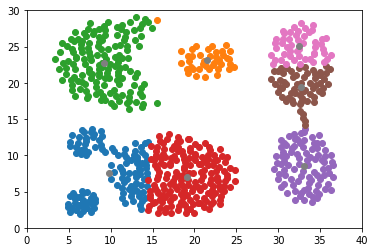

In [109]:
#cluster 0 warna biru
#cluster 1 warna oren
#cluster 2 warna hijau
#cluster 3 warna merah
#cluster 4 warna ungu
#cluster 5 warna coklat
#cluster 6 warna pink
#centroid warna abuabu
#plot data train yang telah di clusterisasi
for i in range(K):
    print ("cluster",i)
    x1 = [nilaiCluster[i][j][0] for j in range(len(indexCluster[i]))] #mengambil nilai x1 pada setiap cluster
    x2 = [nilaiCluster[i][j][1] for j in range(len(indexCluster[i]))] #mengambil nilai x2 pada setiap cluster
    plt.plot(x1, x2, "o")
    plt.axis([0, 40, 0, 30]) #setting range nilai curva
    
x1 = [clusterSet[i][0] for i in range(K)] #ambil nilai x1 pada setiap centroid
x2 = [clusterSet[i][1] for i in range(K)] #ambil nilai x2 pada setiap centroid
plt.plot(x1, x2, "o")
plt.axis([0, 40, 0, 30]) #setting range nilai curva

In [110]:
print (clusterSet)

[[9.820247933884298, 7.551652892561983], [21.47124999999999, 23.16875], [9.206164383561642, 22.693150684931513], [19.093820224719106, 7.0345505617977535], [33.10833333333334, 8.586111111111116], [32.7563492063492, 19.423809523809524], [32.55200000000001, 25.058000000000003]]


In [111]:
#load data test
dataTest = pd.read_csv('TestsetTugas2.txt', delimiter = "\t")
print (dataTest)

       x1     x2
0   18.75  22.95
1   21.45  21.45
2   20.50  22.85
3   20.65  24.30
4   21.70  23.80
5   23.10  21.70
6   13.35  28.45
7   12.40  27.85
8   12.20  28.65
9   12.90  26.50
10  11.15  28.70
11  10.50  28.35
12  10.25  27.25
13  12.60  24.05
14  10.05  25.95
15   8.50  27.05
16   7.55  26.30
17   9.40  25.55
18  10.55  24.35
19   5.40  25.25
20   4.30  24.00
21   6.10  22.60
22   6.40  21.95
23   8.45  17.20
24  12.30  22.75
25   9.95  19.80
26  12.00  20.00
27  11.40  19.25
28  15.20  18.20
29  31.90   4.40
..    ...    ...
70  21.75   8.20
71  23.00   7.35
72  23.70   8.85
73   5.15   3.45
74   4.95   4.05
75   7.10   4.30
76   8.50   3.25
77  32.45  16.75
78  30.55  18.80
79  31.55  19.65
80  33.70  17.00
81  31.75  20.25
82  31.55  22.20
83  30.95  24.15
84  33.65  21.90
85  33.80  20.40
86  36.35  20.60
87  34.60  22.05
88  34.90  23.50
89  33.60  23.90
90  33.70  24.85
91  30.25  24.30
92  31.25  27.85
93  33.85  26.05
94  34.65  26.85
95   9.70  12.10
96   5.70  12.

In [115]:
#clusterisasi data test terhadap nilai centroid yang telah dievaluasi
indexCluster = [[],[],[],[],[],[],[]] #menyimpan index data yang di cluster
nilaiCluster = [[],[],[],[],[],[],[]] #menyimpan nilai x1,x2 data yang di cluster
hasil=[] #menyimpan hasil clusterisasi
for i in range(0,dataTest.shape[0]):
    data = dataClean(dataTest[i:i+1])
    print ("data ke-",i+1)
    minimum = euclideanDistance(data,clusterSet[0]) #menginisialisasi nilai minimum
    clusterr = 0 #menginisialisasi index minimum berada pada cluster apa
    print ("cluster 0 : ",euclideanDistance(data,clusterSet[0]))
    for j in range(1,K):
        print ("cluster",j,": ",euclideanDistance(data,clusterSet[j]))
        if (euclideanDistance(data,clusterSet[j]) < minimum): #jika nilai baru yang dievaluasi lebih kecil maka
            minimum = euclideanDistance(data,clusterSet[j]) #nilai minimum akan di update
            clusterr = j #nilai cluster akan diupdate
    print ("minimum : ", minimum, " pada cluster ", clusterr, "\n")
    indexCluster[clusterr].append(i) #menyimpan index data yang jaraknya paling kecil ke cluster
    nilaiCluster[clusterr].append(data) #menyimpan nilai x1,x2 data yang jaraknya paling kecil ke cluster
    hasil.append(clusterr) #mengisi data ke i masuk ke cluster mana

data ke- 1
cluster 0 :  17.80026869469791
cluster 1 :  2.7300280447277365
cluster 2 :  9.547291230723427
cluster 3 :  15.919162765889984
cluster 4 :  20.309678484000106
cluster 5 :  14.443401170242945
cluster 6 :  13.962050995466253
minimum :  2.7300280447277365  pada cluster  1 

data ke- 2
cluster 0 :  18.1222290416536
cluster 1 :  1.718881358616702
cluster 2 :  12.306784073339799
cluster 3 :  14.606736994921492
cluster 4 :  17.36077110778177
cluster 5 :  11.486469441117151
cluster 6 :  11.673562780916551
minimum :  1.718881358616702  pada cluster  1 

data ke- 3
cluster 0 :  18.657345159838787
cluster 1 :  1.0222172591968797
cluster 2 :  11.294924729221043
cluster 3 :  15.877839352151817
cluster 4 :  19.037557502973232
cluster 5 :  12.726227919030642
cluster 6 :  12.252590256757964
minimum :  1.0222172591968797  pada cluster  1 

data ke- 4
cluster 0 :  19.944690036317052
cluster 1 :  1.3979192126156612
cluster 2 :  11.55609528938729
cluster 3 :  17.335438840597938
cluster 4 :  20.0


data ke- 46
cluster 0 :  5.929321967297115
cluster 1 :  14.40440655233668
cluster 2 :  13.768416657027377
cluster 3 :  5.127349712766872
cluster 4 :  18.0850378954265
cluster 5 :  19.897372903870657
cluster 6 :  22.887751484145408
minimum :  5.127349712766872  pada cluster  3 

data ke- 47
cluster 0 :  7.975644712413473
cluster 1 :  12.587689546735726
cluster 2 :  13.498002743496043
cluster 3 :  5.043186684125731
cluster 4 :  16.615830340408355
cluster 5 :  17.86029037516496
cluster 6 :  20.82120476821647
minimum :  5.043186684125731  pada cluster  3 

data ke- 48
cluster 0 :  5.2356454195079225
cluster 1 :  16.656257926827376
cluster 2 :  15.99863594298056
cluster 3 :  4.1156281236636785
cluster 4 :  18.075435636708466
cluster 5 :  21.18083449873937
cluster 6 :  24.579637263393458
minimum :  4.1156281236636785  pada cluster  3 

data ke- 49
cluster 0 :  2.6203588455544486
cluster 1 :  21.12991192894565
cluster 2 :  17.698122607125633
cluster 3 :  8.722581208689267
cluster 4 :  22.784

cluster 3 :  23.037593761349417
cluster 4 :  16.27464749954873
cluster 5 :  5.507632876677423
cluster 6 :  1.1666910473642935
minimum :  1.1666910473642935  pada cluster  6 

data ke- 92
cluster 0 :  26.41745446317995
cluster 1 :  8.851337646084922
cluster 2 :  21.10509374944863
cluster 3 :  20.556169183033706
cluster 4 :  15.971736707596643
cluster 5 :  5.482610683265589
cluster 6 :  2.4235857731881567
minimum :  2.4235857731881567  pada cluster  6 

data ke- 93
cluster 0 :  29.517065723225734
cluster 1 :  10.841496812018173
cluster 2 :  22.638988129836516
cluster 3 :  24.105095769220714
cluster 4 :  19.353315424010287
cluster 5 :  8.559776508327303
cluster 6 :  3.080660318827768
minimum :  3.080660318827768  pada cluster  6 

data ke- 94
cluster 0 :  30.325201237028132
cluster 1 :  12.709644099069033
cluster 2 :  24.87141072022477
cluster 3 :  24.06931986777431
cluster 4 :  17.479630561539366
cluster 5 :  6.715837422482054
cluster 6 :  1.6336670407399365
minimum :  1.6336670407399365

In [116]:
for i in range (K):
    print ("cluster",i,"\n- index-nya :\n",indexCluster[i])
    print ("- nilai-nya :\n",nilaiCluster[i])
    print ("jumlah :", len(indexCluster[i]),"\n")

cluster 0 
- index-nya :
 [40, 41, 42, 43, 44, 48, 49, 50, 73, 74, 75, 76, 95, 96, 97, 98, 99]
- nilai-nya :
 [[11.05, 9.1], [14.3, 12.45], [14.45, 10.75], [12.35, 8.45], [12.4, 7.1], [10.6, 5.05], [13.9, 5.3], [12.75, 3.0], [5.15, 3.45], [4.95, 4.05], [7.1, 4.3], [8.5, 3.25], [9.7, 12.1], [5.7, 12.25], [7.85, 11.85], [7.65, 11.1], [8.3, 10.55]]
jumlah : 17 

cluster 1 
- index-nya :
 [0, 1, 2, 3, 4, 5]
- nilai-nya :
 [[18.75, 22.95], [21.45, 21.45], [20.5, 22.85], [20.65, 24.3], [21.7, 23.8], [23.1, 21.7]]
jumlah : 6 

cluster 2 
- index-nya :
 [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
- nilai-nya :
 [[13.35, 28.45], [12.4, 27.85], [12.2, 28.65], [12.9, 26.5], [11.15, 28.7], [10.5, 28.35], [10.25, 27.25], [12.6, 24.05], [10.05, 25.95], [8.5, 27.05], [7.55, 26.3], [9.4, 25.55], [10.55, 24.35], [5.4, 25.25], [4.3, 24.0], [6.1, 22.6], [6.4, 21.95], [8.45, 17.2], [12.3, 22.75], [9.95, 19.8], [12.0, 20.0], [11.4, 19.25], [15.2, 18.2]]
jumlah :

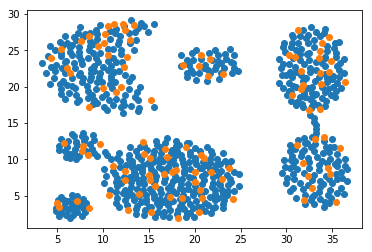

In [117]:
#plot persebaran data train dan data test
plt.plot(dataTrain["x1"], dataTrain["x2"], "o") #warna biru
plt.plot(dataTest["x1"], dataTest["x2"], "o") #warna oren

cluster 0
cluster 1
cluster 2
cluster 3
cluster 4
cluster 5
cluster 6


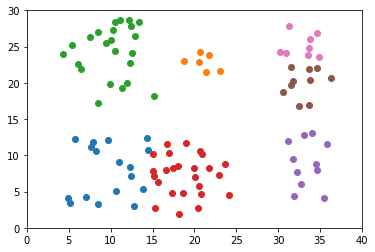

In [118]:
#cluster 0 warna biru
#cluster 1 warna oren
#cluster 2 warna hijau
#cluster 3 warna merah
#cluster 4 warna ungu
#cluster 5 warna coklat
#cluster 6 warna pink
#plot hasil data persebaran data test yang telah di clustering
for i in range(K):
    print ("cluster",i)
    x1 = [nilaiCluster[i][j][0] for j in range(len(indexCluster[i]))]#mengambil nilai x1 pada setiap cluster
    x2 = [nilaiCluster[i][j][1] for j in range(len(indexCluster[i]))] #mengambil nilai x2 pada setiap cluster
    plt.plot(x1, x2, "o")
    plt.axis([0, 40, 0, 30]) # set nilai range curva

In [119]:
#membuat file txt
output = dataTest
output['label'] = hasil #output menambahkan kolom baru berupa label dimana isinya adalah hasil dari clustering
output.to_csv('prediksi.txt', header=True, index=False, sep='\t', mode='a') #membuat file baru yang bernama prediksi.txt